In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [2]:
image_id = "000001"
image_path = f"D:/Skripsi/dataset/images/train/{image_id}.jpg"
label_path = f"D:/Skripsi/dataset/labels/train/{image_id}.txt"

In [3]:
def read_labels(filename, image_width, image_height):
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.split())
            x_center, y_center, width, height = (x_center * image_width, y_center * image_height, 
                                                 width * image_width, height * image_height)
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            labels.append((class_id, x_min, y_min, int(width), int(height)))
    return labels

def display(image_path, label_path):
    
    image = Image.open(image_path)
    w, h = image.size

    labels = read_labels(label_path, w, h)
    fig, ax = plt.subplots()
    ax.imshow(image)
    
    for class_id, x, y, width, height in labels:
        rect = patches.Rectangle((x, y), width, height, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, str(int(class_id)), color='black', 
                bbox=dict(facecolor='red'))

    plt.show()

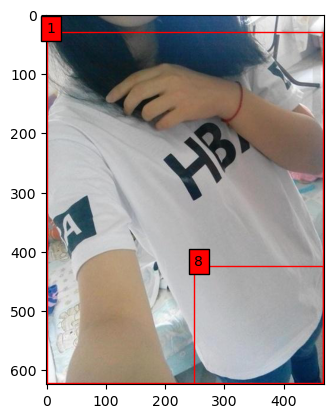

In [4]:
display(image_path, label_path)